In [3]:
from sklearn.model_selection import train_test_split
from feature_engine.datasets import load_titanic
from feature_engine.outliers import OutlierTrimmer
import matplotlib.pyplot as plt

In [2]:

X, y = load_titanic(
    return_X_y_frame=True,
    predictors_only=True,
    handle_missing=True,
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

(X_train.head())

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
501,2,female,13.000000,0,1,19.5000,Missing,S
588,2,female,4.000000,1,1,23.0000,Missing,S
402,2,female,30.000000,1,0,13.8583,Missing,C
1193,3,male,29.881135,0,0,7.7250,Missing,Q
686,3,female,22.000000,0,0,7.7250,Missing,Q


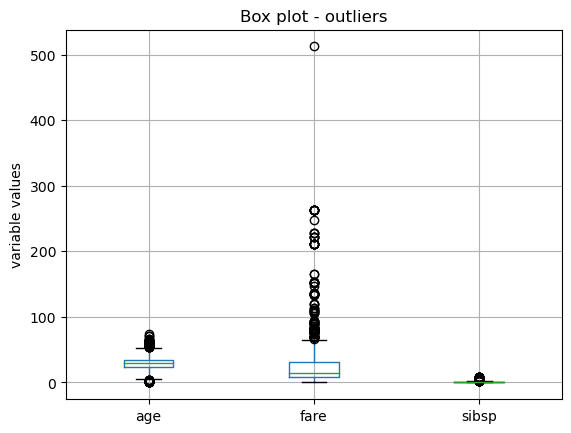

In [4]:
X_train.boxplot(column=['age', 'fare', 'sibsp'])
plt.title("Box plot - outliers")
plt.ylabel("variable values")
plt.show()

In [6]:
X_train.shape

(916, 8)

# Outlier Trimmer

In [7]:
ot = OutlierTrimmer(capping_method='iqr',
                    tail='right',
                    fold=1.5,
                    variables=['sibsp', 'fare'],
                    )

ot.fit(X_train)

OutlierTrimmer(capping_method='iqr', fold=1.5, variables=['sibsp', 'fare'])

In [8]:
ot.right_tail_caps_

{'sibsp': 2.5, 'fare': 66.34379999999999}

In [9]:
train_t = ot.transform(X_train)
test_t = ot.transform(X_test)

In [10]:
X_train.shape, train_t.shape

((916, 8), (764, 8))

In [11]:
train_t[['fare', 'age']].max()


fare    65.0
age     74.0
dtype: float64

In [12]:
X_train[['fare', 'age']].max()


fare    512.3292
age      74.0000
dtype: float64

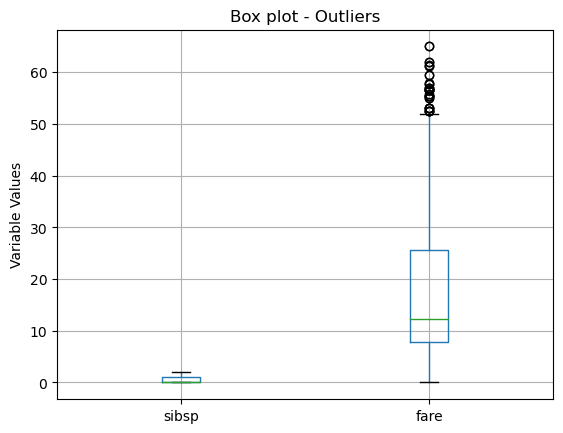

In [14]:
train_t.boxplot(column=['sibsp','fare'])
plt.title("Box plot - Outliers")
plt.ylabel("Variable Values")
plt.show()

In [15]:
train_t, y_train_t = ot.transform_x_y(X_train, y_train)
test_t, y_test_t = ot.transform_x_y(X_test, y_test)

In [16]:
y_train.shape, y_train_t.shape,

((916,), (764,))

In [17]:
ot.get_feature_names_out()


['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked']

# MAD

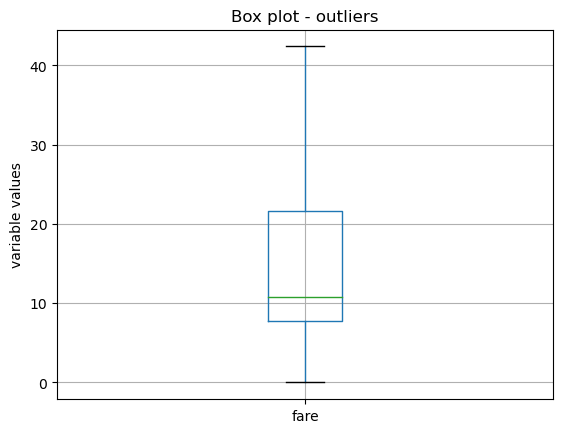

In [18]:
ot = OutlierTrimmer(capping_method='mad',
                    tail='right',
                    fold=3,
                    variables=['fare'],
                    )

ot.fit(X_train)

train_t, y_train_t = ot.transform_x_y(X_train, y_train)
test_t, y_test_t = ot.transform_x_y(X_test, y_test)

train_t.boxplot(column=["fare"])
plt.title("Box plot - outliers")
plt.ylabel("variable values")
plt.show()

## Z-Score

In [19]:
ot_age = OutlierTrimmer(capping_method='gaussian',
                    tail="both",
                    fold=3,
                    variables=['age'],
                    )


ot_age.fit(X_train)

OutlierTrimmer(fold=3, tail='both', variables=['age'])

In [20]:
ot_age.right_tail_caps_

{'age': 67.73951212364803}

In [21]:
ot_age.left_tail_caps_

{'age': -7.410476010820627}

## Percentiles

In [41]:
ot = OutlierTrimmer(capping_method='quantiles',
                    fold=0.05, tail= 'right',
                    variables=['fare'])
ot.fit(X_train)

OutlierTrimmer(capping_method='quantiles', fold=0.05, variables=['fare'])

In [42]:
ot.right_tail_caps_

{'fare': 120.0}